# Лабораторная работа N3

ФИО: Попов Вячеслав Игоревич
Группа: БИВТ-22-2

Что необходимо сделать:

Обучить различного рода модели машинного обучения и сравнить их между собой

# Считывание данных

In [12]:
import pandas as pd
file_path = 'students_adaptability_level_online_education.csv'
ds = pd.read_csv(file_path)
ds.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# 2. Понимаем какая перед нами задача


In [13]:
set(ds['Adaptivity Level'])


{'High', 'Low', 'Moderate'}

3 результата => многоклассовая

# 3. Делаем предобработку данных

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

for item in ds.keys():
  le = LabelEncoder()
  le.fit(ds[item])
  ds[item] = le.transform(ds[item])
ds

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


In [27]:
from sklearn.model_selection import train_test_split

x = ds.drop('Adaptivity Level', axis=1)
y = ds['Adaptivity Level']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# 4. ОБУЧЕНИЕ

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

ovr_lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

for model in (
    ovr_lr,
    rf,
    dt,
    knn
):
  model.fit(X_train, y_train)

Train Metrics for <class 'sklearn.multiclass.OneVsRestClassifier'>:
Accuracy: 0.68, F1-Score: 0.66, ROC-AUC: 0.78
Test Metrics: <class 'sklearn.multiclass.OneVsRestClassifier'>
Accuracy: 0.70, F1-Score: 0.70, ROC-AUC: 0.81


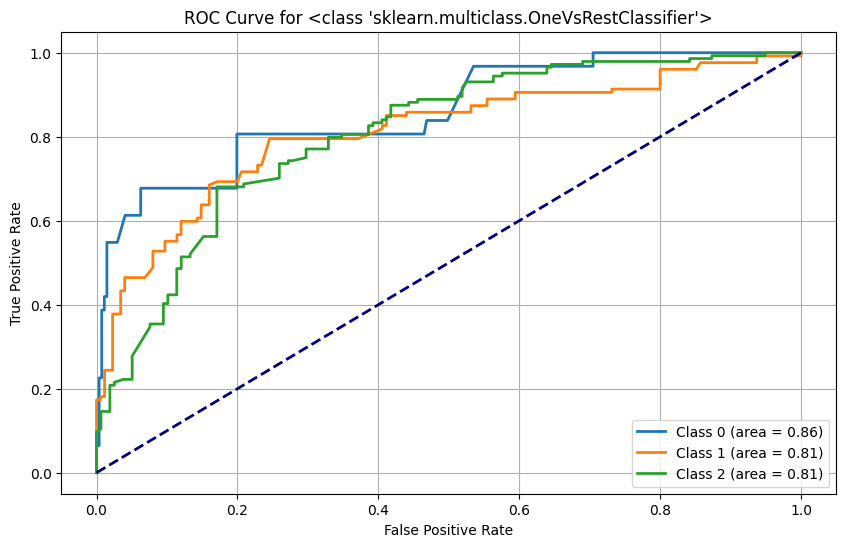

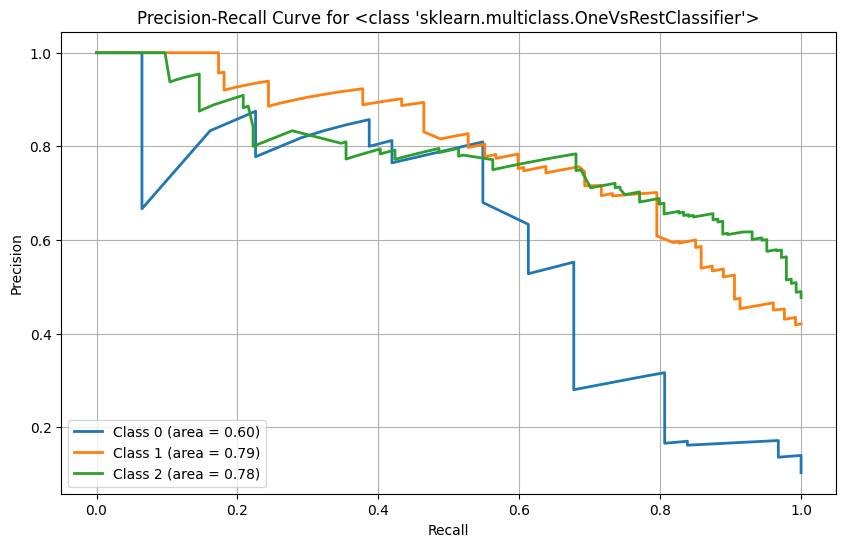

Train Metrics for <class 'sklearn.ensemble._forest.RandomForestClassifier'>:
Accuracy: 0.93, F1-Score: 0.93, ROC-AUC: 0.99
Test Metrics: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.91, F1-Score: 0.91, ROC-AUC: 0.98


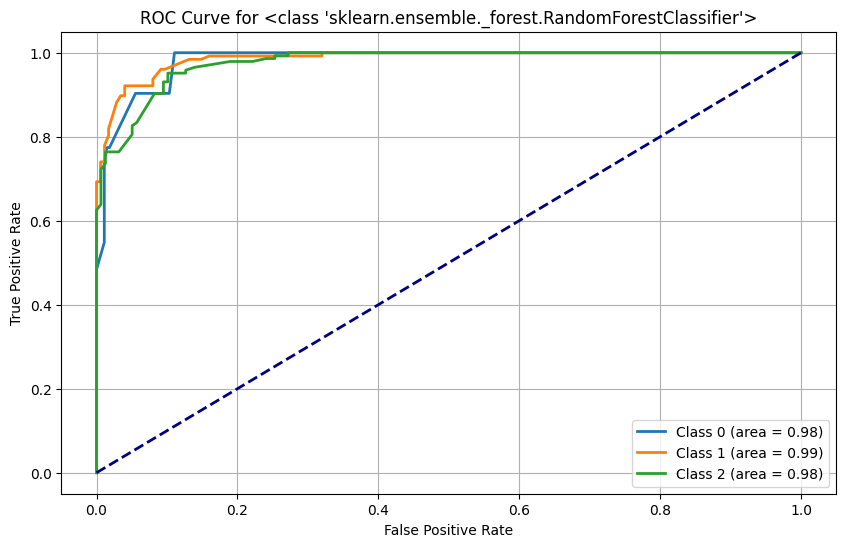

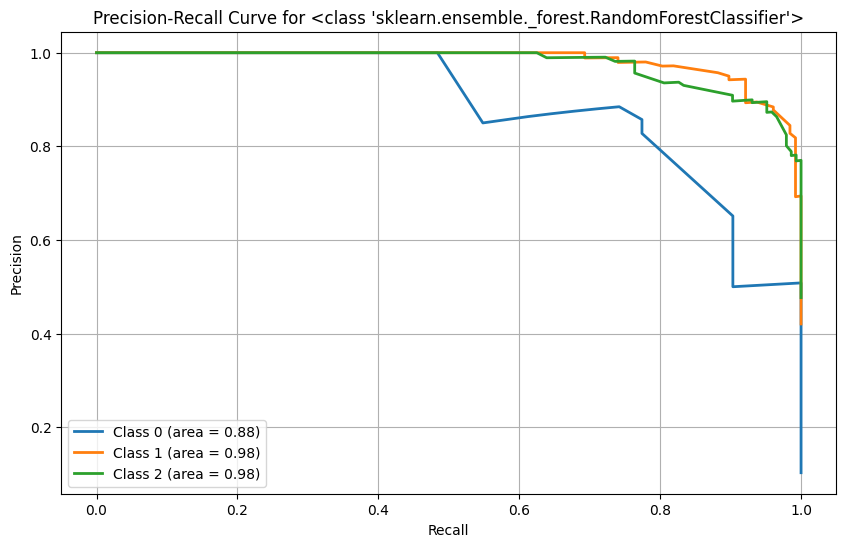

Train Metrics for <class 'sklearn.tree._classes.DecisionTreeClassifier'>:
Accuracy: 0.93, F1-Score: 0.93, ROC-AUC: 0.99
Test Metrics: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.90, F1-Score: 0.90, ROC-AUC: 0.96


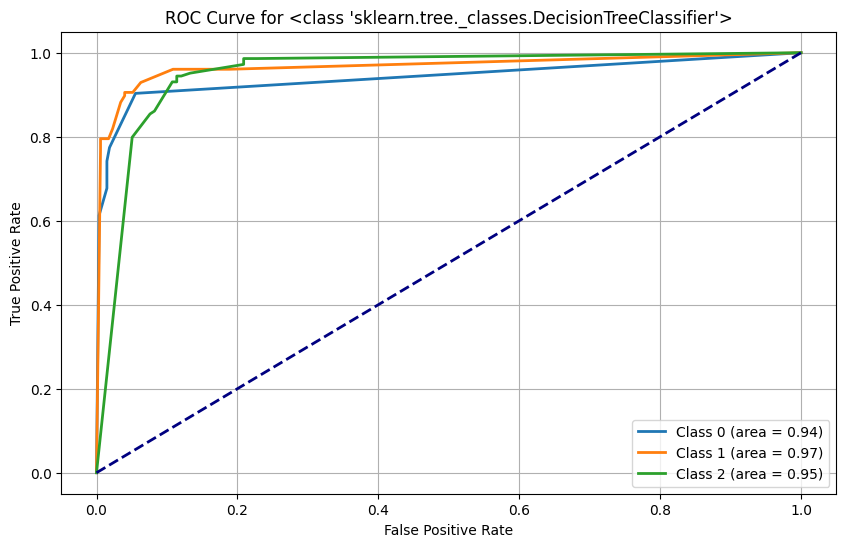

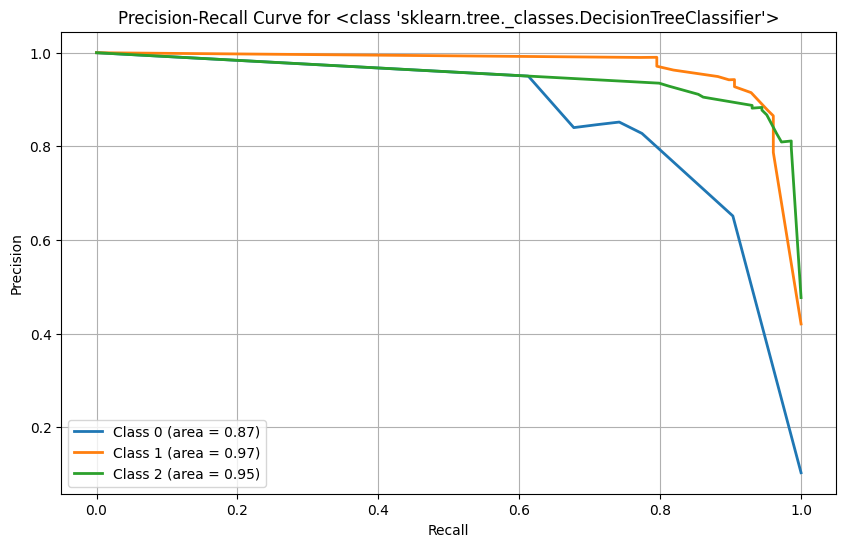

Train Metrics for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>:
Accuracy: 0.87, F1-Score: 0.87, ROC-AUC: 0.96
Test Metrics: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.79, F1-Score: 0.78, ROC-AUC: 0.92


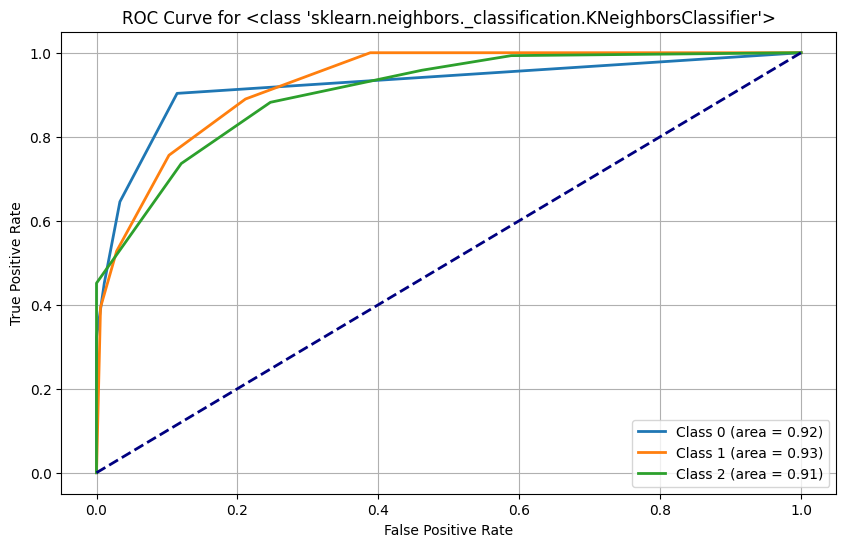

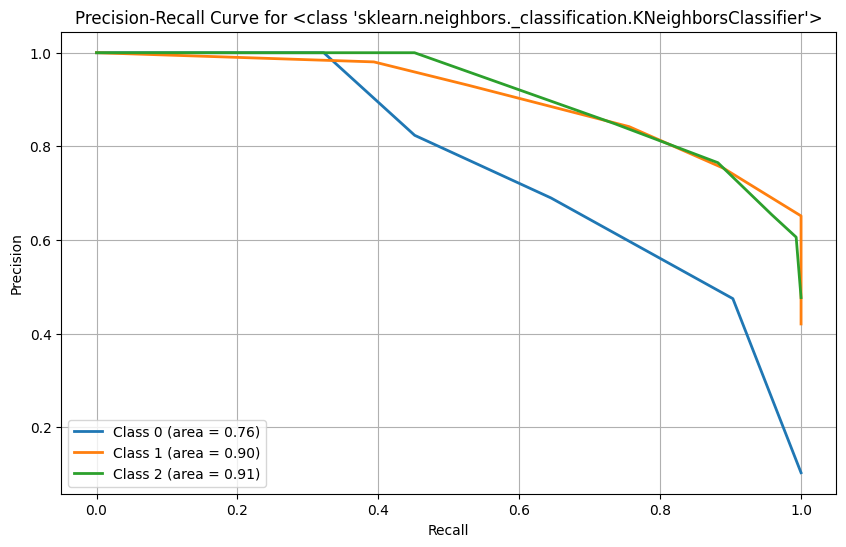

In [29]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_recall_curve,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

classes = sorted(y_train.unique())
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

for model in (
    ovr_lr,
    rf,
    dt,
    knn
):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Предсказания вероятностей
  y_train_proba = model.predict_proba(X_train)
  y_test_proba = model.predict_proba(X_test)

  # Метрики
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  test_f1 = f1_score(y_test, y_test_pred, average='weighted')

  # ROC-AUC для мультиклассовой задачи (OvR)
  train_roc_auc = roc_auc_score(y_train_bin, y_train_proba, average='weighted', multi_class='ovr')
  test_roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')

  print(f"Train Metrics for {type(model)}:")
  print(f"Accuracy: {train_accuracy:.2f}, F1-Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")

  print(f"Test Metrics: {type(model)}")
  print(f"Accuracy: {test_accuracy:.2f}, F1-Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

  # ROC-кривая для каждого класса
  plt.figure(figsize=(10, 6))
  for i, class_name in enumerate(classes):
      fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {type(model)}')
  plt.legend(loc="lower right")
  plt.grid()
  plt.show()

  # PR-кривая для каждого класса
  plt.figure(figsize=(10, 6))
  for i, class_name in enumerate(classes):
      precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_test_proba[:, i])
      pr_auc = auc(recall, precision)
      plt.plot(recall, precision, lw=2, label=f'Class {class_name} (area = {pr_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'Precision-Recall Curve for {type(model)}')
  plt.legend(loc="lower left")
  plt.grid()
  plt.show()